In [1]:
import pandas as pd
import requests
from selenium.common.exceptions import TimeoutException
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import datetime
from trading_bot import *

def get_crossovers(reduced_df, col="position_15"): 
    values = []
    signal_columns = [0]  
    for i in range(reduced_df.shape[0]-1):
        if i == reduced_df.shape[0]:
            break
        i_1 = reduced_df.index[i]
        i_2 =reduced_df.index[i+1]
        val_1 = reduced_df[col].loc[i_1].round(2)
        val_2 = reduced_df[col].loc[i_2].round(2)
        #print(val_1) 
        #print(val_2)
        if np.sign(val_1) == np.sign(val_2):
            
            signal_columns.append(0)
            
        else:
            values.append(reduced_df.index[i+1])
            signal_columns.append(1)
            #print("CROSSOVER")
            #print(i_1, i_2, val_1, val_2)
            #print(" -"*10)
            
    return (values, signal_columns)


df = getData()



API Success
Auth Success
{'1. Information': 'Daily Prices and Volumes for Digital Currency', '2. Digital Currency Code': 'ETH', '3. Digital Currency Name': 'Ethereum', '4. Market Code': 'USD', '5. Market Name': 'United States Dollar', '6. Last Refreshed': '2018-08-27 (end of day)', '7. Time Zone': 'UTC'}


In [2]:
mymask = ((df["datetime"] > datetime.datetime(year=2018,month=5,day=1)))
cols = df.columns.tolist()
reduced_df = df[[cols[0],
                cols[1],
                cols[3],
                cols[5],
                cols[7],
                 cols[-2],
                ]].loc[mymask].reset_index(drop=True).set_index("datetime").astype(float
                                                                                  )
reduced_df.head()

#reduced_df.astype(float)["4a. close (USD)"]

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume
datetime,,,,,
2018-05-02,670.804267,690.038803,665.453463,686.968700,397634.028603
2018-05-03,687.031078,784.548462,686.013193,780.284999,799480.440220
2018-05-04,776.958034,802.585772,759.812857,781.769567,556621.660642
2018-05-05,783.445511,826.432558,780.329696,815.739882,400906.854786
2018-05-06,815.858801,832.498710,755.591289,790.849118,478638.522743


In [3]:
reduced_df['returns'] = np.log(reduced_df["4a. close (USD)"] / reduced_df["4a. close (USD)"].shift(1))

cols = []  # 13

for momentum in [10, 20, 30 ,40]:  # 14
    col = 'position_%s' % momentum  # 15
    reduced_df[col] = np.sign(reduced_df['returns'].ewm(momentum).mean())  # 16
    cols.append(col)  # 17

In [4]:
reduced_df.head(1000)

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,returns,position_10,position_20,position_30,position_40
datetime,,,,,,,,,,
2018-05-02,670.804267,690.038803,665.453463,686.968700,3.976340e+05,NaN,NaN,NaN,NaN,NaN
2018-05-03,687.031078,784.548462,686.013193,780.284999,7.994804e+05,0.127371,1.0,1.0,1.0,1.0
2018-05-04,776.958034,802.585772,759.812857,781.769567,5.566217e+05,0.001901,1.0,1.0,1.0,1.0
2018-05-05,783.445511,826.432558,780.329696,815.739882,4.009069e+05,0.042536,1.0,1.0,1.0,1.0
2018-05-06,815.858801,832.498710,755.591289,790.849118,4.786385e+05,-0.030988,1.0,1.0,1.0,1.0
2018-05-07,790.245290,794.201772,697.807008,751.562496,1.140773e+06,-0.050953,1.0,1.0,1.0,1.0
2018-05-08,752.473194,773.919438,721.479008,749.843380,5.205761e+05,-0.002290,1.0,1.0,1.0,1.0
2018-05-09,747.417179,758.791980,711.487026,749.926621,4.694421e+05,0.000111,1.0,1.0,1.0,1.0
2018-05-10,750.965943,766.928945,725.072031,725.072031,4.044227e+05,-0.033704,-1.0,1.0,1.0,1.0


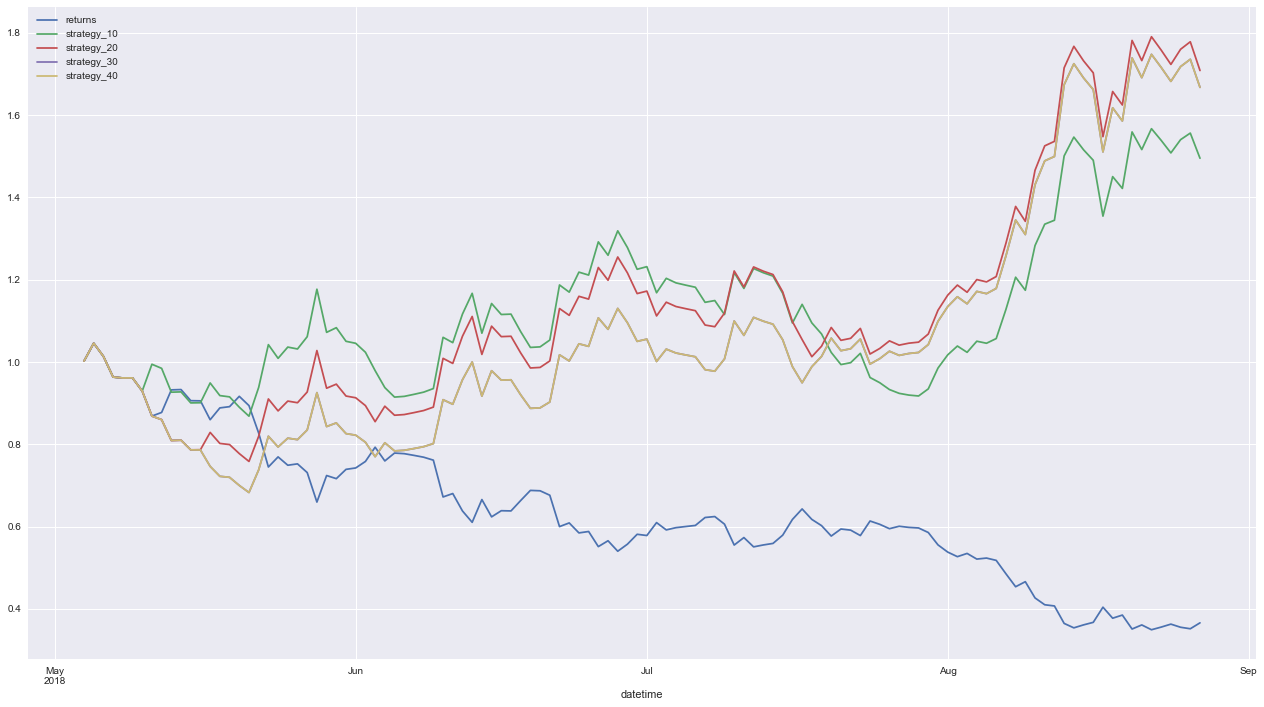

In [15]:
%matplotlib inline
import seaborn as sns; sns.set()  # 18

strats = ['returns']  # 19

for col in cols:  # 20
    strat = 'strategy_%s' % col.split('_')[1]  # 21
    reduced_df[strat] = reduced_df[col].shift(1) * reduced_df['returns']  # 22
    strats.append(strat)  # 23

reduced_df[strats].dropna().cumsum().apply(np.exp).plot(figsize=(22,12))
plt.savefig("strategies_momentum_ethereum.png")# 24

In [6]:
def get_crossovers(reduced_df, col="position_30"): 
    values = []
    signal_columns = [0]  
    for i in range(reduced_df.shape[0]-1):
        if i == reduced_df.shape[0]:
            break
        i_1 = reduced_df.index[i]
        i_2 =reduced_df.index[i+1]
        val_1 = reduced_df[col].loc[i_1].round(2)
        val_2 = reduced_df[col].loc[i_2].round(2)
        #print(val_1) 
        #print(val_2)
        if np.sign(val_1) == np.sign(val_2):
            
            signal_columns.append(0)
            
        else:
            values.append(reduced_df.index[i+1])
            signal_columns.append(1)
            #print("CROSSOVER")
            #print(i_1, i_2, val_1, val_2)
            #print(" -"*10)
            
    return (values, signal_columns)



0:  780.28499885
0:  1.0
1:  725.07203125
1:  -1.0
2:  727.26593329
2:  1.0
3:  706.79897975
3:  -1.0
4:  715.03720142
4:  1.0
5:  697.44014152
5:  -1.0
6:  618.57276344
6:  1.0
7:  592.54132784
7:  -1.0
8:  485.2871707
8:  1.0
9:  472.7046473
9:  -1.0
10:  481.59299755
10:  1.0
11:  450.12383261
11:  -1.0
12:  478.63927505
12:  1.0
13:  464.08124103
13:  -1.0
14:  468.69672061
14:  1.0
15:  465.44664445
15:  -1.0


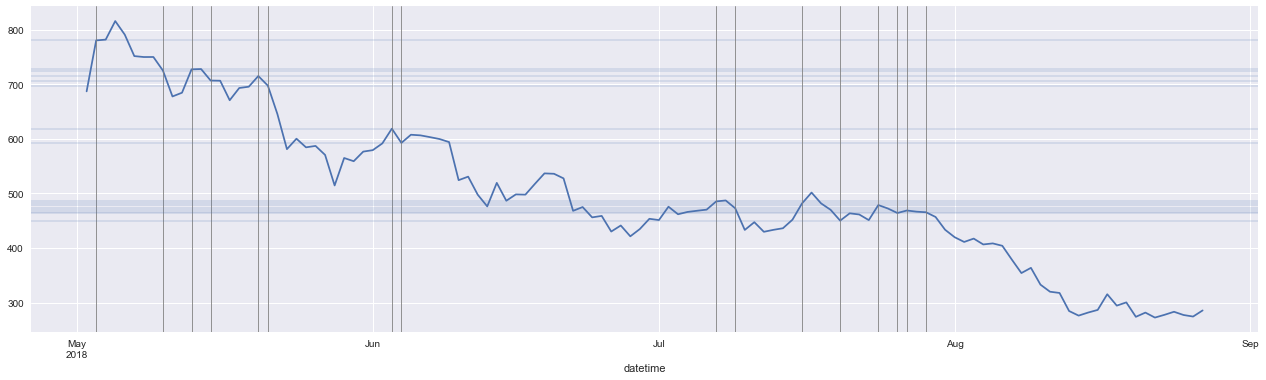

In [16]:
reduced_df["4a. close (USD)"].plot(figsize=(22,6))
counter = 0
for i in get_crossovers(reduced_df, col="position_10")[0]:
    plt.axvline(i, c="grey", linewidth=0.83)
    plt.axhline(reduced_df["4a. close (USD)"].loc[i], linewidth=0.3)
    print("%s: "%counter, reduced_df["4a. close (USD)"].loc[i])
    print("%s: "%counter, reduced_df["position_10"].loc[i])
    counter = counter+1 
    
plt.savefig("strategies_positions_ethereum.png")

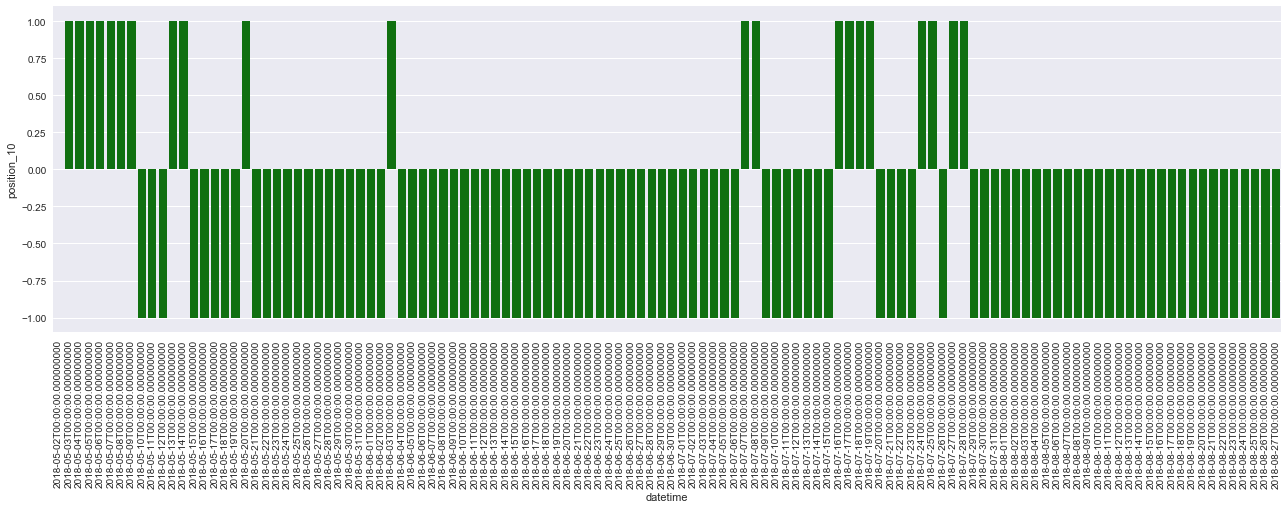

In [12]:
plt.figure(figsize=(22,6))
plt.xticks(rotation=90)
fig = sns.barplot(reduced_df["position_10"].index, reduced_df["position_10"], color="green")


In [10]:
reduced_df.to_excel("momentum_strategy_etherum.xlsx")